# 用户信息可视化

In [2]:
## 导包
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv('用户基本信息.csv')
df.head()

,userid,cms_segid,cms_group_id,final_gender_code,age_level,pvalue_level,shopping_level,occupation,new_user_class_level
0,234,0,5,2,5,NaN,3,0,3.0
1,523,5,2,2,2,1.0,3,1,2.0
2,612,0,8,1,2,2.0,3,0,NaN
3,1670,0,4,2,4,NaN,1,0,NaN
4,2545,0,10,1,4,NaN,3,0,NaN


In [4]:
df.shape

(1048575, 9)

In [5]:
# 设置数据抽取的大小
chunksize = 1000
df = pd.read_csv('用户基本信息.csv', chunksize=chunksize)
df2 = pd.DataFrame()
start_index = 0
for u in df:
    print("正在处理第" + str(start_index) + "行数据")
    df2 = df2.append(u.loc[start_index],ignore_index = True)
    start_index += chunksize
print('数据处理完成')

正在处理第0行数据
正在处理第1000行数据
正在处理第2000行数据
正在处理第3000行数据
正在处理第4000行数据
正在处理第5000行数据
正在处理第6000行数据
正在处理第7000行数据
正在处理第8000行数据
正在处理第9000行数据
正在处理第10000行数据
正在处理第11000行数据
正在处理第12000行数据
正在处理第13000行数据
正在处理第14000行数据
正在处理第15000行数据
正在处理第16000行数据
正在处理第17000行数据
正在处理第18000行数据
正在处理第19000行数据
正在处理第20000行数据
正在处理第21000行数据
正在处理第22000行数据
正在处理第23000行数据
正在处理第24000行数据
正在处理第25000行数据
正在处理第26000行数据
正在处理第27000行数据
正在处理第28000行数据
正在处理第29000行数据
正在处理第30000行数据
正在处理第31000行数据
正在处理第32000行数据
正在处理第33000行数据
正在处理第34000行数据
正在处理第35000行数据
正在处理第36000行数据
正在处理第37000行数据
正在处理第38000行数据
正在处理第39000行数据
正在处理第40000行数据
正在处理第41000行数据
正在处理第42000行数据
正在处理第43000行数据
正在处理第44000行数据
正在处理第45000行数据
正在处理第46000行数据
正在处理第47000行数据
正在处理第48000行数据
正在处理第49000行数据
正在处理第50000行数据
正在处理第51000行数据
正在处理第52000行数据
正在处理第53000行数据
正在处理第54000行数据
正在处理第55000行数据
正在处理第56000行数据
正在处理第57000行数据
正在处理第58000行数据
正在处理第59000行数据
正在处理第60000行数据
正在处理第61000行数据
正在处理第62000行数据
正在处理第63000行数据
正在处理第64000行数据
正在处理第65000行数据
正在处理第66000行数据
正在处理第67000行数据
正在处理第68000行数据
正在处理第69000行数据
正在处理第70000行数据
正在处理第71000行数据
正在处理第

In [6]:
# 检查是否抽取成功
df2

,age_level,cms_group_id,cms_segid,final_gender_code,new_user_class_level,occupation,pvalue_level,shopping_level,userid
0,5.0,5.0,0.0,2.0,3.0,0.0,NaN,3.0,234.0
1,5.0,5.0,45.0,2.0,3.0,0.0,2.0,3.0,422485.0
2,5.0,5.0,0.0,2.0,2.0,0.0,NaN,2.0,826386.0
3,4.0,4.0,0.0,2.0,NaN,0.0,NaN,3.0,80006.0
4,3.0,9.0,67.0,1.0,3.0,0.0,2.0,3.0,501981.0
...,...,...,...,...,...,...,...,...,...
1044,2.0,8.0,0.0,1.0,2.0,1.0,NaN,3.0,628328.0
1045,5.0,5.0,41.0,2.0,1.0,0.0,1.0,3.0,1037483.0
1046,2.0,8.0,0.0,1.0,2.0,0.0,NaN,3.0,324639.0
1047,3.0,3.0,0.0,2.0,4.0,0.0,NaN,3.0,751048.0


In [7]:
# 查看shopping_level 一共有多少个等级
df2['shopping_level'].unique()

array([3., 2., 1.])

In [8]:
# 查看这三个购物等级各自占比的情况
df2.groupby('shopping_level').count()['userid']


shopping_level
1.0     69
2.0    143
3.0    837
Name: userid, dtype: int64

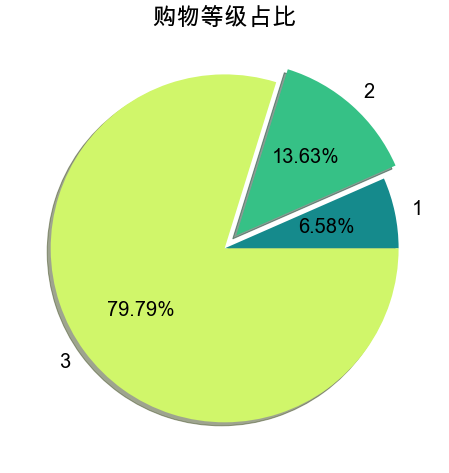

In [9]:
# 解决中文显示问题
plt.figure(figsize=(8,8))
font = {"family":"Arial Unicode MS","size":"20"}
plt.rc("font",**font)

plt.pie(df2.groupby('shopping_level').count()['userid'],
        labels = [1,2,3],
        shadow = True, 
        colors = ['#158A8C','#36C186','#D0F66A'],
        autopct = "%.2f%%",
        explode = [0,0.1,0] )

plt.title('购物等级占比')
plt.show()

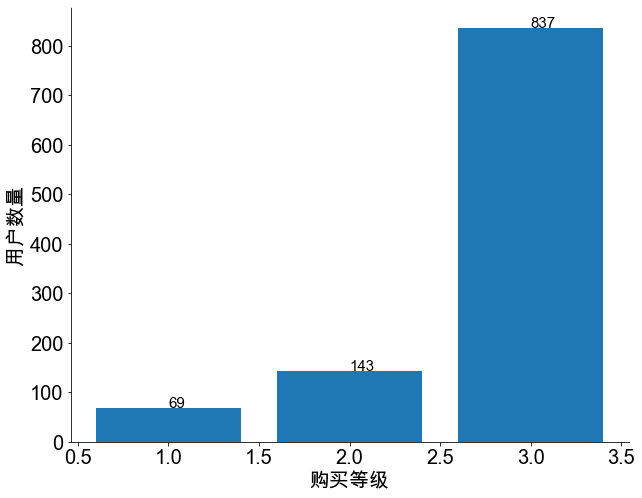

In [13]:
# 柱状图绘制各购买等级用户的数量
plt.figure(figsize=(10,8))
labels = [1,2,3]
y = df2.groupby('shopping_level').count()['userid']

plt.bar(labels,height = y)

#在每一个柱子上显示具体的数量
for a,b in zip(labels,y):
    plt.text(a,b,'%.0f'%b,fontsize = 15)

# 去掉边框
ax = plt.gca()
ax.spines['right'].set_color('white')
ax.spines['top'].set_color('white')

plt.xlabel('购买等级')
plt.ylabel('用户数量')

plt.show()

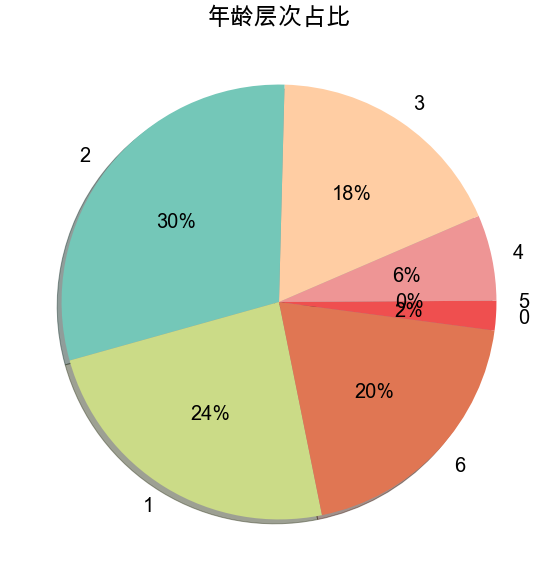

In [28]:
# 年龄层次的饼图占比
plt.figure(figsize=(13,10))
labels = df2['age_level'].unique()
x = df2.groupby('age_level').count()['shopping_level']

plt.pie(x, labels = labels.astype(int),
        colors = ["#EF4F4F","#EE9595","#FFCDA3","#74C7B8",'#CBDB87','#E07653'],
        shadow = True,
        autopct='%.0f%%')
plt.title('年龄层次占比')
plt.show()

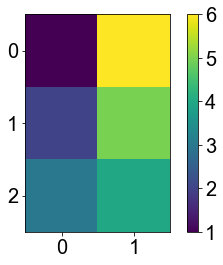

In [34]:
# 构建年龄和购物等级之间的关系
# 热力图
# 解决负号显示的问题
plt.rcParams['axes.unicode_minus'] = False

# x = [[1,2],[3,4],[5,6]]
x = [[1,6],[2,5],[3,4]] # 数值越低，颜色越深

plt.imshow(x)
plt.colorbar()
plt.show()

In [36]:
# 构建年龄和购物等级之间的关系
# 首先构建年龄的购物等级之间的关系数组
# 已知的思路是横轴是年龄，纵轴购物等级，每个年龄层对应购物等级的人数
# 数据样式

'''
1
2
3
  1 2 3 4 5 6

'''

'\n1\n2\n3\n  1 2 3 4 5 6\n\n'

In [44]:
# 先单个计算，年龄1 消费1 的有多少
age_level_group_data = df2.groupby('age_level').count()
age_level_group_data = age_level_group_data.drop(0)
age_level_group_data

,cms_group_id,cms_segid,final_gender_code,new_user_class_level,occupation,pvalue_level,shopping_level,userid
age_level,,,,,,,,
1.0,67,67,67,27,67,21,67,67
2.0,190,190,190,134,190,107,190,190
3.0,312,312,312,234,312,158,312,312
4.0,250,250,250,180,250,111,250,250
5.0,207,207,207,137,207,95,207,207
6.0,22,22,22,13,22,8,22,22


In [45]:
# 拿到 age_level 中的每一个值，然后进行shopping_level 的计算
age_level_group_data.index.values

array([1., 2., 3., 4., 5., 6.])

In [54]:
# 赋值列表数据
for i in age_level_group_data.index.values:
    result = df2[df2['age_level'] == i].groupby('shopping_level').count()['age_level']
    print(result)
    if i == 1:
        x = result
    x = np.column_stack((x,result))
print(x)

shopping_level
1.0     8
2.0    14
3.0    45
Name: age_level, dtype: int64
shopping_level
1.0      9
2.0     18
3.0    163
Name: age_level, dtype: int64
shopping_level
1.0     14
2.0     44
3.0    254
Name: age_level, dtype: int64
shopping_level
1.0     18
2.0     28
3.0    204
Name: age_level, dtype: int64
shopping_level
1.0     18
2.0     33
3.0    156
Name: age_level, dtype: int64
shopping_level
1.0     2
2.0     6
3.0    14
Name: age_level, dtype: int64
[[  8   8   9  14  18  18   2]
 [ 14  14  18  44  28  33   6]
 [ 45  45 163 254 204 156  14]]


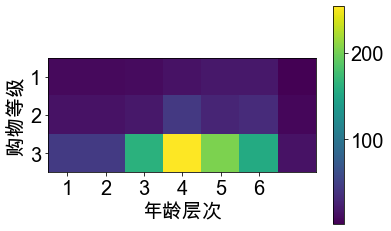

In [58]:
# 生成最终热力图
plt.imshow(x)
# cmap 
plt.xlabel('年龄层次')
plt.ylabel('购物等级')

# 修改x轴和y轴的刻度
plt.xticks(np.arange(6),np.arange(1,df2['age_level'].unique().astype(int).max()+1))
plt.yticks(np.arange(3),np.arange(1,df2['shopping_level'].unique().astype(int).max()+1))
plt.colorbar()
plt.show()

# 结束